# AEWS Python Notebook 09b: complete (pre-batch) WQ algorithm

**Author**: Eric Lehmann, CSIRO Data61  
**Date**: Aug. 03, 2016.

**Note**: this notebook should be accessible and viewable at https://github.com/eric542/agdc_v2/tree/master/notebooks.

## Summary

This notebook is used in conjunction with '_AEWS Python Notebook 09a_', which brings together all the AEWS components tested / implemented in earlier notebooks. It implements the whole AEWS workflow, starting from the selected ROI and AGDC data, and ultimately creating a NetCDF dataset containing a time series of WQ maps with associated ancillary information. For testing purposes, this is here carried out for a single selected polygon, and thus represents a pre-batch version. A fully automated batch script executed on the NCI will automatically iterate through all the polygons of interest.

This notebook version (09b) is used to test the outputs of the code in '_AEWS Python Notebook 09a_', plotting a data time series following its creation, and subsequently, after data has been appended to the NetCDF file.


## Preliminaries

This (Jupyter) notebook was written for use on the NCI's VDI system, with the following pre-loaded module:

```
 $ module use /g/data/v10/public/modules/modulefiles --append
 $ module load agdc-py2-prod/1.0.3 
```

In [1]:
%matplotlib inline
from netCDF4 import Dataset, num2date, date2num
import numpy as np
import xarray as xr
import matplotlib.image as img
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = (8,8)   # increase plot size a bit...
rcParams['axes.formatter.useoffset'] = False   # disable scalar formatter / offset in axes labels

The code block below is executed after one run of '_AEWS Python Notebook 09a_', with start date defined as '2013-03-01' and end date '2013-05-01'...

Satellite flags are:
[u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_7'
 u'LANDSAT_8' u'LANDSAT_8']


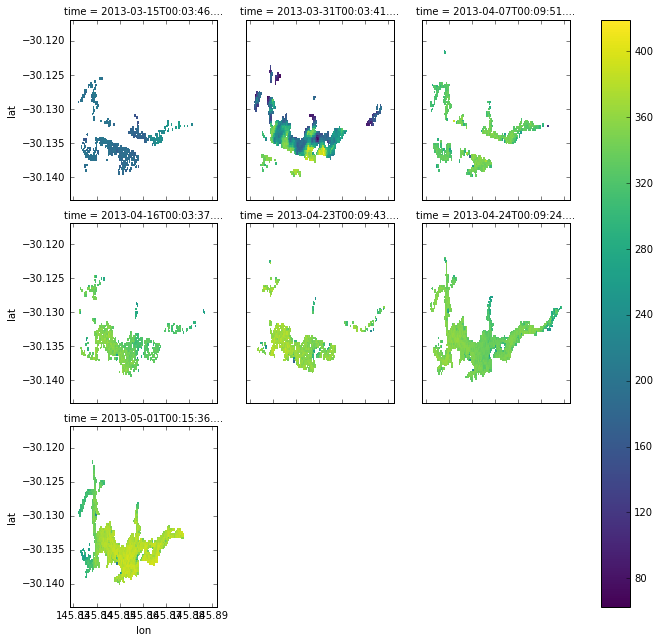

In [2]:
roi_save_name = '/g/data/jr4/vis_data_v2.0/EIGHT_MILE.nc'
roi_nc_grp = Dataset(roi_save_name, mode='a')

dat = roi_nc_grp.variables['WQ_data']
times = roi_nc_grp.variables['time']
lats = roi_nc_grp.variables['lat']
lons = roi_nc_grp.variables['lon']

times = num2date( list(times), times.units, times.calendar )   # datetime.datetime object

WQ_xarray_TS_geo = xr.DataArray( np.array(dat), coords=[ ('time', times), ('lat', lats), ('lon', lons) ] )
WQ_xarray_TS_geo.plot(col='time',col_wrap=3);

print( "Satellite flags are:" )
print( roi_nc_grp.variables['satellite_flags'][:] )

roi_nc_grp.close()

The code block below is executed after a second run of '_AEWS Python Notebook 09a_', with end date now defined as '2013-06-01', and with the extra month of data appended to the `.nc` file:

Satellite flags are:
[u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_7'
 u'LANDSAT_8' u'LANDSAT_8' u'LANDSAT_7' u'LANDSAT_8']


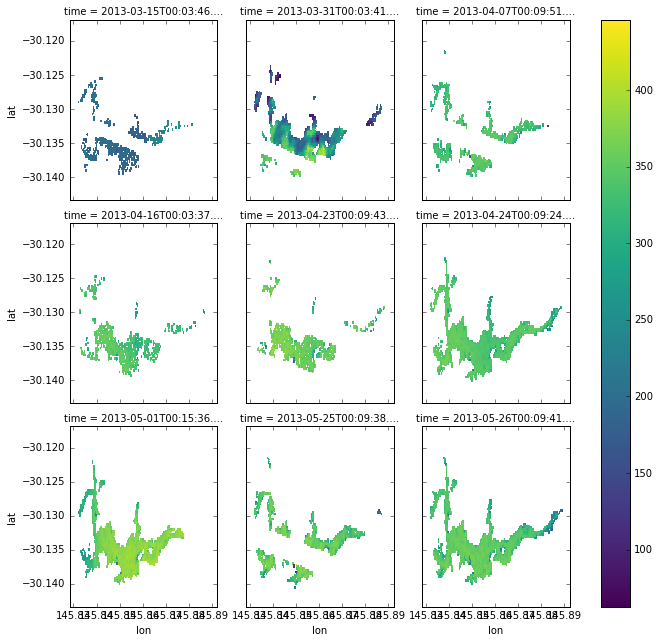

In [3]:
# After second run of 'AEWS Python Notebook 09a', with new data appended, end date '2013-06-01':
roi_save_name = '/g/data/jr4/vis_data_v2.0/EIGHT_MILE.nc'
roi_nc_grp = Dataset(roi_save_name, mode='a')

dat = roi_nc_grp.variables['WQ_data']
times = roi_nc_grp.variables['time']
lats = roi_nc_grp.variables['lat']
lons = roi_nc_grp.variables['lon']

times = num2date( list(times), times.units, times.calendar )   # datetime.datetime object

WQ_xarray_TS_geo = xr.DataArray( np.array(dat), coords=[ ('time', times), ('lat', lats), ('lon', lons) ] )
WQ_xarray_TS_geo.plot(col='time',col_wrap=3);

print( "Satellite flags are:" )
print(roi_nc_grp.variables['satellite_flags'][:])

roi_nc_grp.close()

Two extra time slices in May 2013, one from Landsat 7 and one from Landsat 8, were correctly added to the time series on file.